In [34]:
import pandas as pd

df = pd.read_excel('data.xlsx')
df = df.drop(columns=['PERIODO'])
df.head()

,EVENTO,MODALIDAD_DE_EJECUCION,COSTO_DE_OBRA-EXP_TEC,COSTO_ACTUALIZADO,RANGO_DE_INVERSION,SALDO_DE_INVERSION,TIPO_DE_OBRA,MACRO_REGION,ANO_INICIO_OBRA,ULT_AVANCE_MES,ULT_AVANCE_ANO,PLAZO_DE_EJECUCION,AVANCE_FISICO,NIVEL_DE_GOBIERNO,SECTOR,UNIDAD_ORGANICA,LEY_31589,INVENTARIO_OBRAS_PARALIZADAS_MEF,CAUSAL_PARALIZACION
0,PROCESO NORMAL,CONTRATA,13531201.21,1.479620e+14,> 10 - 100,457085.53,TRANSPORTES Y COMUNICACIONES,Norte,2021,3,2024,180,94.20,G. LOCAL,TRANSPORTES Y COMUNICACIONES,GERENCIA REGIONAL DE CONTROL DE CAJAMARCA,SI,NO,14 OTROS
1,PROCESO NORMAL,CONTRATA,28683771.13,2.818403e+07,> 10 - 100,1633072.91,EDUCACIóN/CULTURA,Centro,2022,5,2024,300,95.82,G. LOCAL,CULTURA,GERENCIA REGIONAL DE CONTROL DE ANCASH,SI,SI,14 OTROS
2,PROCESO NORMAL,CONTRATA,76517780.68,8.143476e+07,> 10 - 100,1235339.55,TRANSPORTES Y COMUNICACIONES,Sur,2020,9,2024,360,82.85,G. NACIONAL,TRANSPORTES Y COMUNICACIONES,SUBGERENCIA DE CONTROL DEL SECTOR TRANSPORTES ...,SI,NO,2 INCUMPLIMIENTO DE CONTRATO
3,PROCESO NORMAL,CONTRATA,14429654.72,1.442965e+07,> 10 - 100,8872473.66,EDUCACIóN/CULTURA,Sur,2023,9,2024,330,40.95,G. LOCAL,EDUCACIÓN,GERENCIA REGIONAL DE CONTROL DE PUNO,SI,NO,10 FALTA DE RECURSOS FINANCIEROS Y LIQUIDEZ
4,PROCESO NORMAL,CONTRATA,10156340.70,1.084175e+07,> 10 - 100,1349762.75,"VIVIENDA, CONSTRUCCIóN Y SANEAMIENTO",Sur,2022,6,2024,270,88.46,G. LOCAL,"VIVIENDA, CONSTRUCCIÓN Y SANEAMIENTO",GERENCIA REGIONAL DE CONTROL DE PUNO,SI,NO,2 INCUMPLIMIENTO DE CONTRATO


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13756 entries, 0 to 13755
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EVENTO                            13756 non-null  object 
 1   MODALIDAD_DE_EJECUCION            13756 non-null  object 
 2   COSTO_DE_OBRA-EXP_TEC             13756 non-null  float64
 3   COSTO_ACTUALIZADO                 13756 non-null  float64
 4   RANGO_DE_INVERSION                13756 non-null  object 
 5   SALDO_DE_INVERSION                13756 non-null  float64
 6   TIPO_DE_OBRA                      13756 non-null  object 
 7   MACRO_REGION                      13756 non-null  object 
 8   ANO_INICIO_OBRA                   13756 non-null  int64  
 9   ULT_AVANCE_MES                    13756 non-null  int64  
 10  ULT_AVANCE_ANO                    13756 non-null  int64  
 11  PLAZO_DE_EJECUCION                13756 non-null  int64  
 12  AVAN

## Conversión de variables categóricas a dummy

In [36]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('CAUSAL_PARALIZACION')

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13756 entries, 0 to 13755
Data columns (total 97 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   COSTO_DE_OBRA-EXP_TEC                                                                   13756 non-null  float64
 1   COSTO_ACTUALIZADO                                                                       13756 non-null  float64
 2   SALDO_DE_INVERSION                                                                      13756 non-null  float64
 3   ANO_INICIO_OBRA                                                                         13756 non-null  int64  
 4   ULT_AVANCE_MES                                                                          13756 non-null  int64  
 5   ULT_AVANCE_ANO                                                     

,COSTO_DE_OBRA-EXP_TEC,COSTO_ACTUALIZADO,SALDO_DE_INVERSION,ANO_INICIO_OBRA,ULT_AVANCE_MES,ULT_AVANCE_ANO,PLAZO_DE_EJECUCION,AVANCE_FISICO,CAUSAL_PARALIZACION,EVENTO_REACTIVACIóN ECONóMICA,...,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR EDUCACIÓN,"UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR JUSTICIA, POLÍTICO Y ELECTORAL",UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR PRODUCTIVO Y TRABAJO,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SALUD,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SEGURIDAD INTERNA Y EXTERNA,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SOCIAL Y CULTURA,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR TRANSPORTES Y COMUNICACIONES,"UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR VIVIENDA, CONSTRUCCIÓN Y SANEAMIENTO",LEY_31589_SI,INVENTARIO_OBRAS_PARALIZADAS_MEF_SI
0,13531201.21,1.479620e+14,457085.53,2021,3,2024,180,94.20,14 OTROS,False,...,False,False,False,False,False,False,False,False,True,False
1,28683771.13,2.818403e+07,1633072.91,2022,5,2024,300,95.82,14 OTROS,False,...,False,False,False,False,False,False,False,False,True,True
2,76517780.68,8.143476e+07,1235339.55,2020,9,2024,360,82.85,2 INCUMPLIMIENTO DE CONTRATO,False,...,False,False,False,False,False,False,True,False,True,False
3,14429654.72,1.442965e+07,8872473.66,2023,9,2024,330,40.95,10 FALTA DE RECURSOS FINANCIEROS Y LIQUIDEZ,False,...,False,False,False,False,False,False,False,False,True,False
4,10156340.70,1.084175e+07,1349762.75,2022,6,2024,270,88.46,2 INCUMPLIMIENTO DE CONTRATO,False,...,False,False,False,False,False,False,False,False,True,False


## Codificación de la variable objetivo

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['CAUSAL_PARALIZACION'] = label_encoder.fit_transform(df_encoded['CAUSAL_PARALIZACION'])

causal_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


causal_mapping, df_encoded[['CAUSAL_PARALIZACION']].head()



({'10 FALTA DE RECURSOS FINANCIEROS Y LIQUIDEZ': np.int64(0),
  '14 OTROS': np.int64(1),
  '2 INCUMPLIMIENTO DE CONTRATO': np.int64(2)},
    CAUSAL_PARALIZACION
 0                    1
 1                    1
 2                    2
 3                    0
 4                    2)

## Normalización de los datos

In [38]:
from sklearn.preprocessing import MinMaxScaler


numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('CAUSAL_PARALIZACION')  
df_encoded[numeric_columns] = MinMaxScaler().fit_transform(df_encoded[numeric_columns])


df_encoded.head()





,COSTO_DE_OBRA-EXP_TEC,COSTO_ACTUALIZADO,SALDO_DE_INVERSION,ANO_INICIO_OBRA,ULT_AVANCE_MES,ULT_AVANCE_ANO,PLAZO_DE_EJECUCION,AVANCE_FISICO,CAUSAL_PARALIZACION,EVENTO_REACTIVACIóN ECONóMICA,...,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR EDUCACIÓN,"UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR JUSTICIA, POLÍTICO Y ELECTORAL",UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR PRODUCTIVO Y TRABAJO,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SALUD,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SEGURIDAD INTERNA Y EXTERNA,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR SOCIAL Y CULTURA,UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR TRANSPORTES Y COMUNICACIONES,"UNIDAD_ORGANICA_SUBGERENCIA DE CONTROL DEL SECTOR VIVIENDA, CONSTRUCCIÓN Y SANEAMIENTO",LEY_31589_SI,INVENTARIO_OBRAS_PARALIZADAS_MEF_SI
0,2.887938e-10,2.438860e-03,0.495687,0.823529,0.181818,0.9375,0.024573,1.865070e-15,1,False,...,False,False,False,False,False,False,False,False,True,False
1,6.124312e-10,4.643812e-10,0.495687,0.882353,0.363636,0.9375,0.040956,1.897148e-15,1,False,...,False,False,False,False,False,False,False,False,True,True
2,1.634098e-09,1.342114e-09,0.495687,0.764706,0.727273,0.9375,0.049147,1.640327e-15,2,False,...,False,False,False,False,False,False,True,False,True,False
3,3.079835e-10,2.376676e-10,0.495687,0.941176,0.727273,0.9375,0.045051,8.106592e-16,0,False,...,False,False,False,False,False,False,False,False,True,False
4,2.167115e-10,1.785281e-10,0.495687,0.882353,0.454545,0.9375,0.036860,1.751412e-15,2,False,...,False,False,False,False,False,False,False,False,True,False


In [39]:
numeric_columns

['COSTO_DE_OBRA-EXP_TEC',
 'COSTO_ACTUALIZADO',
 'SALDO_DE_INVERSION',
 'ANO_INICIO_OBRA',
 'ULT_AVANCE_MES',
 'ULT_AVANCE_ANO',
 'PLAZO_DE_EJECUCION',
 'AVANCE_FISICO']

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df_encoded.drop('CAUSAL_PARALIZACION', axis=1)
y = df_encoded['CAUSAL_PARALIZACION']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(3, activation='softmax')
])


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


model.summary()


history = model.fit(X_train, y_train, epochs=1000, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])


test_loss, test_accuracy = model.evaluate(X_test, y_test)  
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rae = mae / np.mean(np.abs(y_test - np.mean(y_test)))
rrse = rmse / np.std(y_test)


print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Correlation Coefficient (R2 Score): {r2:.4f}")
print(f"Relative Absolute Error (RAE): {rae:.4f}")
print(f"Root Relative Squared Error (RRSE): {rrse:.4f}")



GPU Disponible: []


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3795 - loss: 1.4462 - val_accuracy: 0.4493 - val_loss: 1.0389 - learning_rate: 1.0000e-04
Epoch 2/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 1.2351 - val_accuracy: 0.5520 - val_loss: 0.9523 - learning_rate: 1.0000e-04
Epoch 3/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4878 - loss: 1.1248 - val_accuracy: 0.5711 - val_loss: 0.9125 - learning_rate: 1.0000e-04
Epoch 4/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5064 - loss: 1.0492 - val_accuracy: 0.5852 - val_loss: 0.8854 - learning_rate: 1.0000e-04
Epoch 5/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5323 - loss: 1.0071 - val_accuracy: 0.5902 - val_loss: 0.8670 - learning_rate: 1.0000e-04
Epoch 6/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5317 - loss: 0.9888 - val_accuracy: 0.5979 - val_loss: 0.8491 - learning_rate: 1.0000e-04
Epoch 7/1000
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

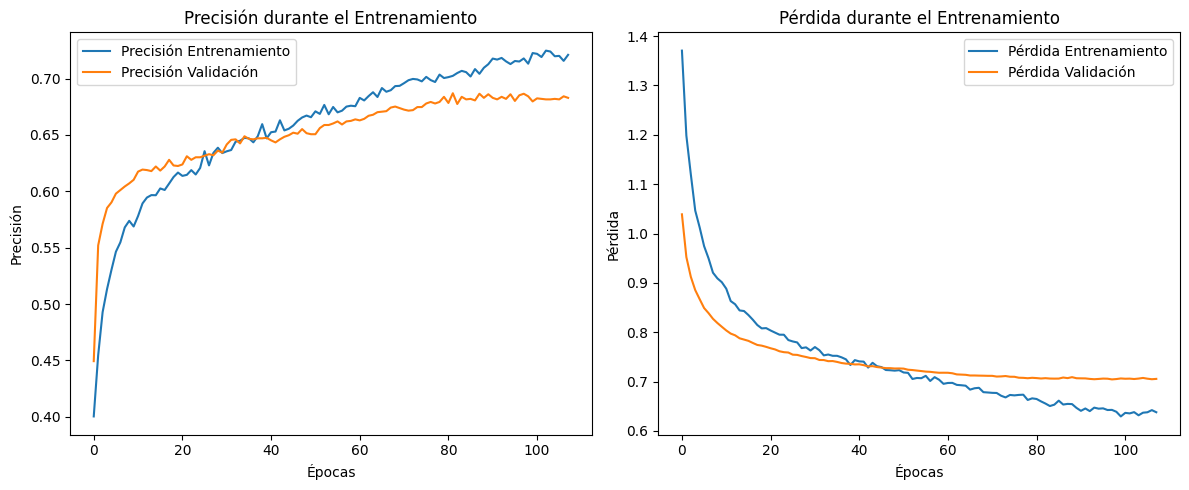

In [41]:
import matplotlib.pyplot as plt

def plot_overfitting(history):
    # Precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Precisión durante el Entrenamiento')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Pérdida durante el Entrenamiento')

    plt.tight_layout()
    plt.show()


plot_overfitting(history)
